In [4]:
from joblib import Parallel, delayed
from sympy import *
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import animation
import base64
from IPython.display import HTML

/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/2738128579.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#         Cys-C, Met-M, Phe-F, Ile-I, Leu-L, Val-V, Trp-W, Tyr-Y, Ala-A, Gly-G, Thr-T, Ser-S, Asn-N, Gln-Q, Asp-D, Glu-E, His-H, Arg-R, Lys-K, Pro-P
imat = [[ -5.44, -4.99, -5.80, -5.50, -5.83, -4.96, -4.95, -4.16, -3.57, -3.16, -3.11, -2.86, -2.59, -2.85, -2.41, -2.27, -3.60, -2.57, -1.95, -3.07], # Cys-C
        [ -4.99, -5.46, -6.56, -6.02, -6.41, -5.32, -5.55, -4.91, -3.94, -3.39, -3.51, -3.03, -2.95, -3.30, -2.57, -2.89, -3.98, -3.12, -2.48, -3.45], # Met-M
        [ -5.80, -6.56, -7.26, -6.84, -7.28, -6.29, -6.16, -5.66, -4.81, -4.13, -4.28, -4.02, -3.75, -4.10, -3.48, -3.56, -4.77, -3.98, -3.36, -4.25], # Phe-F
        [ -5.50, -6.02, -6.84, -6.54, -7.04, -6.05, -5.78, -5.25, -4.58, -3.78, -4.03, -3.52, -3.24, -3.67, -3.17, -3.27, -4.14, -3.63, -3.01, -3.76], # Ile-I
        [ -5.83, -6.41, -7.28, -7.04, -7.37, -6.48, -6.14, -5.67, -4.91, -4.16, -4.34, -3.92, -3.74, -4.04, -3.40, -3.59, -4.54, -4.03, -3.37, -4.20], # Leu-L
        [ -4.96, -5.32, -6.29, -6.05, -6.48, -5.52, -5.18, -4.62, -4.04, -3.38, -3.46, -3.05, -2.83, -3.07, -2.48, -2.67, -3.58, -3.07, -2.49, -3.32], # Val-V
        [ -4.95, -5.55, -6.16, -5.78, -6.14, -5.18, -5.06, -4.66, -3.82, -3.42, -3.22, -2.99, -3.07, -3.11, -2.84, -2.99, -3.98, -3.41, -2.69, -3.73], # Trp-W
        [ -4.16, -4.91, -5.66, -5.25, -5.67, -4.62, -4.66, -4.17, -3.36, -3.01, -3.01, -2.78, -2.76, -2.97, -2.76, -2.79, -3.52, -3.16, -2.60, -3.19], # Tyr-Y
        [ -3.57, -3.94, -4.81, -4.58, -4.91, -4.04, -3.82, -3.36, -2.72, -2.31, -2.32, -2.01, -1.84, -1.89, -1.70, -1.51, -2.41, -1.83, -1.31, -2.03], # Ala-A
        [ -3.16, -3.39, -4.13, -3.78, -4.16, -3.38, -3.42, -3.01, -2.31, -2.24, -2.08, -1.82, -1.74, -1.66, -1.59, -1.22, -2.15, -1.72, -1.15, -1.87], # Gly-G
        [ -3.11, -3.51, -4.28, -4.03, -4.34, -3.46, -3.22, -3.01, -2.32, -2.08, -2.12, -1.96, -1.88, -1.90, -1.80, -1.74, -2.42, -1.90, -1.31, -1.90], # Thr-T
        [ -2.86, -3.03, -4.02, -3.52, -3.92, -3.05, -2.99, -2.78, -2.01, -1.82, -1.96, -1.67, -1.58, -1.49, -1.63, -1.48, -2.11, -1.62, -1.05, -1.57], # Ser-S
        [ -2.59, -2.95, -3.75, -3.24, -3.74, -2.83, -3.07, -2.76, -1.84, -1.74, -1.88, -1.58, -1.68, -1.71, -1.68, -1.51, -2.08, -1.64, -1.21, -1.53], # Asn-N
        [ -2.85, -3.30, -4.10, -3.67, -4.04, -3.07, -3.11, -2.97, -1.89, -1.66, -1.90, -1.49, -1.71, -1.54, -1.46, -1.42, -1.98, -1.80, -1.29, -1.73], # Gln-Q
        [ -2.41, -2.57, -3.48, -3.17, -3.40, -2.48, -2.84, -2.76, -1.70, -1.59, -1.80, -1.63, -1.68, -1.46, -1.21, -1.02, -2.32, -2.29, -1.68, -1.33], # Asp-D
        [ -2.27, -2.89, -3.56, -3.27, -3.59, -2.67, -2.99, -2.79, -1.51, -1.22, -1.74, -1.48, -1.51, -1.42, -1.02, -0.91, -2.15, -2.27, -1.80, -1.26], # Glu-E
        [ -3.60, -3.98, -4.77, -4.14, -4.54, -3.58, -3.98, -3.52, -2.41, -2.15, -2.42, -2.11, -2.08, -1.98, -2.32, -2.15, -3.05, -2.16, -1.35, -2.25], # His-H
        [ -2.57, -3.12, -3.98, -3.63, -4.03, -3.07, -3.41, -3.16, -1.83, -1.72, -1.90, -1.62, -1.64, -1.80, -2.29, -2.27, -2.16, -1.55, -0.59, -1.70], # Arg-R
        [ -1.95, -2.48, -3.36, -3.01, -3.37, -2.49, -2.69, -2.60, -1.31, -1.15, -1.31, -1.05, -1.21, -1.29, -1.68, -1.80, -1.35, -0.59, -0.12, -0.97], # Lys-K
        [ -3.07, -3.45, -4.25, -3.76, -4.20, -3.32, -3.73, -3.19, -2.03, -1.87, -1.90, -1.57, -1.53, -1.73, -1.33, -1.26, -2.25, -1.70, -0.97, -1.75]] # Pro-P
imat = np.array(imat)

In [6]:
# the list of aminoacid 1 letter codes
names = ['C','M','F','I','L','V','W','Y','A','G','T','S','N','Q','D','E','H','R','K','P']

# Dictionary for translating 1 letter code to numeric index for MJ interaction matrix
d = {names[i]:i for i in range(len(names))}

In [7]:
def get_combinations(pos):
    # This variable holds a list of all possible unique combinations of
    # aminoacid in the chain. This is for interaction energy computations

    n = len(pos)
    comb = np.array(np.meshgrid(range(n), range(n))).T.reshape((-1,2))
    comb = comb[comb[:,1]-comb[:,0]>0]

    return comb

In [13]:
def total_energy(pos, seq, comb=None):
    '''Computes the total energy of the system.

    pos: numpy array with shape (n, 2)
    '''

    if type(seq) == str:
        seq = [d[a] for a in seq]

    s = seq

    if comb is None:
        comb = get_combinations(pos)

    tot = 0
    for c in comb:
        dl1 = np.abs(pos[c[1]] - pos[c[0]]).sum()
        if dl1 == 0:
            # Overlap
            tot += 1000
        elif dl1 == 1 and c[1] - c[0] > 2:
            # Contact
            tot += imat[s[c[0]], s[c[1]]]

    return tot


In [8]:
# These are the possible directions to choose in random walk
# Only consider moving from the current position
dirs = {
    (  1,  0): np.array([(  0,  1),
                         ( -1,  0),
                         (  0, -1)]),
    (  0,  1): np.array([(  1,  0),
                         ( -1,  0),
                         (  0, -1)]),
    ( -1,  0): np.array([(  1,  0),
                         (  0,  1),
                         (  0, -1)]),
    (  0, -1): np.array([(  1,  0),
                         (  0,  1),
                         ( -1,  0)]),
}

In [9]:
def simulate_trajectory(prot_seq, sched, jobid=0):

    Nit = len(sched)

    seed = dt.now().microsecond * (jobid + 1)

    # Working in parallel, better reseed
    np.random.seed(seed)

    # The sequence translated to index
    s = [d[a] for a in prot_seq]

    # length of the sequence
    N = len(s)

    pos = np.zeros((N, 2))
    pos[:,0] = range(N)

    tra = np.empty((Nit, N, 2))

    comb = get_combinations(pos)

    # Random numbers for selecting residue
    I = np.random.randint(2, N, size=Nit)

    # Random numbers for selecting walking direction
    J = np.random.randint(3, size=Nit)

    # Third aminoacid walks only up or right. This is to avoid redundant conformations
    J[I == 2] = 0

    # Throw a dice for proposal acceptance/rejection
    K = np.random.uniform(size=Nit)

    # History of accepted conformations
    H = np.empty((Nit,))

    # Energy trace
    E = np.empty((Nit,))

    # measure current energy
    E0 = total_energy(pos, s, comb)

    # main loop
    for it, (i, j, dice, T) in enumerate(zip(I, J, K, sched)):

        # store current position
        # we will need to restore it if walk is not successful
        curr = pos[i:].copy()

        # one step is to be taken using previous aminoacid as reference
        back = tuple(pos[i] - pos[i-1])

        # random walk
        wdir = dirs[back][j] - back

        pos[i:] += wdir

        # new energy of the system
        E1 = total_energy(pos, s, comb)

        # Delta E: change of energy will determine the probability
        # of accepting this step
        dE = E1 - E0

        # Simulated Annealing
        prob = np.exp(-dE/T)
        accept = prob > dice

        if not accept:
            pos[i:] = curr
            H[it] = 0
        else:
            E0 = E1
            H[it] = 1

        E[it] = E0
        tra[it] = pos

    return tra, H, E, seed, pos

In [10]:
def make_viz(pos, prot_seq, info=None, movie=False, schedule=[], energy_func=[]):
    if movie:
        return make_movie(pos, schedule, prot_seq, energy_func)

    if (len(pos.shape) == 3 and pos.shape[2] == 2):
        pos = pos[-1]

    qbit_model = False
    if pos.shape[1] != 2:
        qbit_model = True
        q = pos[-1]
        def dw(j):
            return (1 - q[2*j])*(1 - q[2*j + 1])

        def rg(j):
            return (1 - q[2*j])*q[2*j + 1]

        def lf(j):
            return q[2*j]*(1 - q[2*j + 1])

        def up(j):
            return q[2*j]*q[2*j + 1]

        def x(j):
            return sum([(rg(k) - lf(k)) for k in range(j)])

        def y(j):
            return sum([(up(k) - dw(k)) for k in range(j)])

        pos = np.array([(x(j), y(j)) for j in range(len(prot_seq))])

    n = pos.shape[0]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, aspect=1)
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(-n, n, 10)
    minor_ticks = np.arange(-n, n, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ax.plot(*pos.T, '-bo', linewidth=5, markersize=20, alpha=0.7)
    ax.set_xlim([-n,n])
    ax.set_ylim([-n,n])

    if info is not None:
        ax.text(-n+1, n-1, f"{info}", fontsize=15)

    if prot_seq:
        for i, (x, y) in enumerate(pos):
            ax.text(x, y, prot_seq[i], color='white', verticalalignment='center', horizontalalignment='center', fontweight='bold')

    info = ''
    if len(schedule) > 0:
        info = f'{info}Temperature = {schedule[-1]:.6f}'
    if prot_seq:
        if qbit_model:
            system_ene = energy_func(*q)
        else:
            system_ene = total_energy(pos, prot_seq)
        info = f'{info}\nEnergy = {system_ene:.2f}'
    ax.text(-n+1, n-1, info, fontsize=15)


In [34]:
def make_movie(traj, schedule, prot_seq, energy_func=[]):

    qbit_model = False
    if len(traj.shape) == 2:
        qbit_model = True

        N, n, di = (len(schedule), len(prot_seq), 2)

        trajectory = np.zeros((N, n, di))
        q = np.zeros((N, traj.shape[1]))
        for i, qs in enumerate(traj):

            def dw(j):
                return (1 - qs[2*j])*(1 - qs[2*j + 1])

            def rg(j):
                return (1 - qs[2*j])*qs[2*j + 1]

            def lf(j):
                return qs[2*j]*(1 - qs[2*j + 1])

            def up(j):
                return qs[2*j]*qs[2*j + 1]

            def x(j):
                return sum([(rg(k) - lf(k)) for k in range(j)])

            def y(j):
                return sum([(up(k) - dw(k)) for k in range(j)])

            trajectory[i] = np.array([(x(j), y(j)) for j in range(len(prot_seq))])
            q[i] = qs
    else:
        N, n, di = traj.shape
        trajectory = traj

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, aspect=1)
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(-n, n, 10)
    minor_ticks = np.arange(-n, n, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_xlim([-n, n])
    ax.set_ylim([-n, n])

    conformation, = ax.plot([], [], '-bo', linewidth=5, markersize=20, alpha=0.7)
    temperature = ax.text(-n+1, n-1, '', fontsize=15, verticalalignment='top')

    seq_txt = [None] * len(prot_seq)
    if prot_seq:
        for i, (x, y) in enumerate(trajectory[1]):
            seq_txt[i] = ax.text(x, y, prot_seq[i], color='white', verticalalignment='center', horizontalalignment='center', fontweight='bold')

    def init():
        conformation.set_data([], [])
        temperature.set_text('')
        return conformation,

    def animate(i):
        pos = trajectory[i]
        conformation.set_data(*pos.T)
        info = ''
        if len(schedule) > 0:
            info = f'{info}Temperature = {schedule[i]:.6f}'
        if prot_seq:
            if qbit_model:
                system_ene = energy_func(*q[i])
            else:
                system_ene = total_energy(pos, prot_seq)
            info = f'{info}\nEnergy = {system_ene:.2f}'
        temperature.set_text(info)
        if prot_seq:
            for i, (x, y) in enumerate(pos):
                seq_txt[i].set_x(x)
                seq_txt[i].set_y(y)
        return conformation,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=N, interval=20, blit=True)
    anim.save('trajectory.mp4', fps=30)
    plt.show()



In [19]:
#QUANTUM ANNEALING:

def u(i, j):
    # eqn 22
    # Helps to determine number of qbits for overlap
    return int(((1 + j - i) % 2) * np.ceil(2*np.log2(j - i)))


def prepare_quantum(prot_seq, return_Hs=False):

    # length of the sequence
    N = len(prot_seq)

    # The sequence translated to index
    s = [d[a] for a in prot_seq]

    # Determine number of qbits needed
    # qbits for turns: first qbit position, number of qbits and qbits
    ftq = 0
    ntq = 2 * (N-1)
    # ancilla qbits for overlap
    foq = ftq + ntq
    noq = sum([sum([u(i,j) for j in range(i+4, N+1)]) for i in range(N-4)])
    # ancilla qbits for pairwise interactions
    fiq = foq + noq
    niq = int((N-3)*(N-2)/2)

    Nqbits = ntq + noq + niq

    # Symbolic computation of Energy function

    q = symbols([f'q{i:04d}' for i in range(Nqbits)])
    q = np.array(q)

    # 0 0 down
    # 0 1 right
    # 1 0 left
    # 1 1 up

    def dw(j):
        nonlocal q
        return (1 - q[2*j])*(1 - q[2*j + 1])

    def rg(j):
        nonlocal q
        return (1 - q[2*j])*q[2*j + 1]

    def lf(j):
        nonlocal q
        return q[2*j]*(1 - q[2*j + 1])

    def up(j):
        nonlocal q
        return q[2*j]*q[2*j + 1]

    def back(j):
        nonlocal q
        return rg(j)*lf(j+1) + lf(j)*rg(j+1) + up(j)*dw(j+1) + dw(j)*up(j+1)

    def x(j):
        return sum([(rg(k) - lf(k)) for k in range(j)])

    def y(j):
        return sum([(up(k) - dw(k)) for k in range(j)])

    def g(i, j):
        # eqn 16
        return (x(i) - x(j))**2 + (y(i) - y(j))**2

    def c(i, j):
        # eqn 25
        return sum([sum([u(m, n) for n in range(m+4, N+1)]) for m in range(i+1)]) - sum([u(i, n) for n in range(j, N+1)]) + foq

    def alpha(i,j):
        uij = u(i,j)
        cij = c(i,j)
        return sum([q[cij+k]*2**k for k in range(uij)])

    def w(i,j):
        nonlocal q
        return q[i*((N-3)-i+1) + int((i-1)*i/2) - (i - j) - 3 + fiq]

    def J(i, j):
        if (j-i) % 2:
            return imat[s[i], s[j]]
        else:
            # only odd pairs can be in contact
            return 0

    def H_back():
        l_back = 10
        return sum([back(j) for j in range(N-2)]) * l_back

    def H_olap():
        # Idea, l_olap needs to big large enough so that its penalization compensates the favoring term in H_inte
        # so it would be good it we customize each l_olap according to each Jij
        l_olap = 10
        return sum([sum([l_olap*((1+i-j)%2)*(2**u(i,j) - g(i,j) - alpha(i, j))**2 for j in range(i+4, N)]) for i in range(N-4)])

    def H_inte():
        # eqn 32
        return sum([sum([w(i,j)*J(i,j)*(2-g(i,j)) for j in range(i+3, N)]) for i in range(N-3)])

    # Build energy terms (symbolic expressions)
    Hb = (H_back())
    Ho = (H_olap()) if noq > 0 else 0
    Hi = (H_inte())

    energy_expr = Hb + Ho + Hi

    if return_Hs:
        return prot_seq, q, energy_expr, (Hb, Ho, Hi)
    else:
        return prot_seq, q, energy_expr

In [20]:
def simulate_quantum(prot_seq, q_sym, energy_expr, sched, jobid=0):

    # Callable function to compute energy
    energy = lambdify(q_sym, energy_expr)

    # length of the sequence
    N = len(prot_seq)

    # Determine number of qbits needed
    # qbits for turns: first qbit position, number of qbits and qbits
    ftq = 0
    ntq = 2 * (N-1)
    # ancilla qbits for overlap
    foq = ftq + ntq
    noq = sum([sum([u(i,j) for j in range(i+4, N+1)]) for i in range(N-4)])
    # ancilla qbits for pairwise interactions
    fiq = foq + noq
    niq = int((N-3)*(N-2)/2)

    Nqbits = ntq + noq + niq

    assert Nqbits == len(q_sym), "Error!!!"

    Nit = len(sched)

    seed = dt.now().microsecond * (jobid + 1)

    # Working in parallel, better reseed
    np.random.seed(seed)

    # initialize qbits vector
    q = [0 for i in range(Nqbits)]
    q = np.array(q)

    # Set initial positions
    q[ftq:ftq+ntq] = [0, 1] * (N-1)
    q[foq:foq+noq] = 1
    q[fiq:fiq+niq] = 0

    def dw(j):
        nonlocal q
        return (1 - q[2*j])*(1 - q[2*j + 1])

    def rg(j):
        nonlocal q
        return (1 - q[2*j])*q[2*j + 1]

    def lf(j):
        nonlocal q
        return q[2*j]*(1 - q[2*j + 1])

    def up(j):
        nonlocal q
        return q[2*j]*q[2*j + 1]

    def x(j):
        nonlocal q
        return sum([(rg(k) - lf(k)) for k in range(j)])

    def y(j):
        nonlocal q
        return sum([(up(k) - dw(k)) for k in range(j)])

    def pos():
        # translates q vector to position coordinates
        # useful for visualization
        return np.array([(x(j), y(j)) for j in range(len(prot_seq))])

    tra = np.empty((Nit, Nqbits))

    # Random numbers for selecting qbit
    Q = np.random.randint(3, len(q), size=Nit)

    # Throw a dice for proposal acceptance/rejection
    K = np.random.uniform(size=Nit)

    # History of accepted conformations
    H = np.empty((Nit,))

    # Energy trace
    E = np.empty((Nit,))

    # measure current energy
    E0 = energy(*q)

    # main loop
    for it, (i, dice, T) in enumerate(zip(Q, K, sched)):
#     for it, (dice, T) in enumerate(zip(K, sched)):
#         i = (it % (Nqbits-3)) + 3

        # flip selected qbit
        q[i] = 0 if q[i] else 1

        # new energy of the system
        E1 = energy(*q)

        # Delta E: change of energy will determine the probability
        # of accepting this step
        dE = E1 - E0

        # Simulated Annealing
        prob = np.exp(-dE/T)
        accept = prob > dice

        if not accept:
            # flip back
            q[i] = 0 if q[i] else 1
            H[it] = 0
        else:
            E0 = E1
            H[it] = 1

        E[it] = E0
        tra[it] = q

    return tra, H, E, seed, q

In [21]:
def show_video():
    video = open('trajectory.mp4', 'rb').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" controls>
                           <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                        </video>'''.format(encoded.decode('ascii')))


def viz_short_smpl(smpl, prot_seq, q, energy_func):
    qstr_short = [smpl[k] if k in smpl.keys() else 0 for k in q[3:]]
    qstr = np.array([[0, 1, 0] + qstr_short])
    make_viz(qstr, prot_seq, movie=False, energy_func=energy_func)


def preprocess_expr(H, q):
    # Helper function to clean resulting expressions
    # some zero coefficients fail to evaluate to 0, rounding is necessary
    # for all qbits, qi**n = qi. bc qi in [0,1]

    H = expand(H).evalf()
    tmp = H
    for a in preorder_traversal(tmp):
        if isinstance(a, Float):
            H = H.subs(a, round(a, 8))
    degr = Poly(H).degree()
    for qi in q:
        for n in reversed(range(2, degr + 1)):
            H = H.subs(qi**n, qi)
    return H

In [22]:
#SIMULATED TURN ANCILLA ENCODING

In [57]:
# The sequence of protein to fold
#prot_seq = "YYDPETGTWY"
prot_seq = "QGSWQRSLQ"

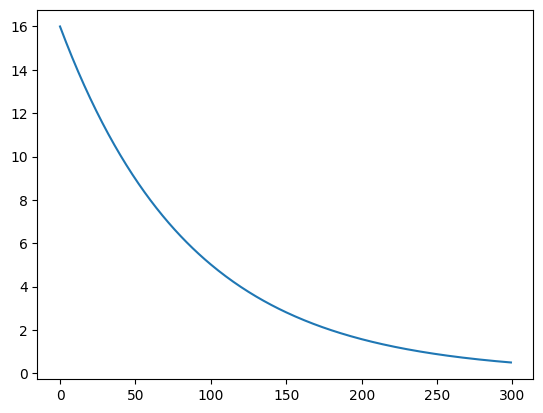

In [58]:
prot_seq, q, energy_expr = prepare_quantum(prot_seq)
energy_func = lambdify(q, energy_expr)
sched = np.power(2, np.linspace(4, -1, 300))
max(sched), min(sched), len(sched)
plt.plot(sched)
plt.show()

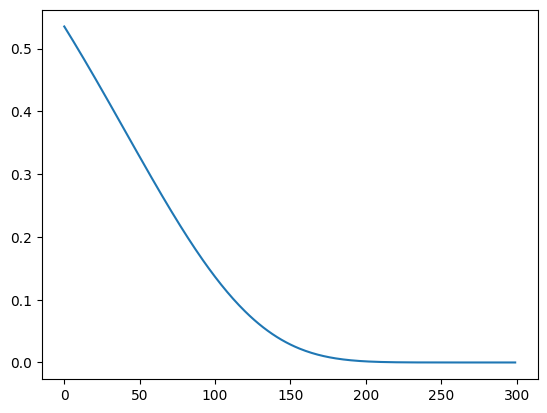

In [59]:
plt.plot(np.exp(-10/sched))
plt.show()

/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: overflow encountered in exp
/var/folders/1d/kcghq1vj1vsdrvzqy0y2yhz00000gn/T/ipykernel_19731/3775370116.py:102: RuntimeWarning: over

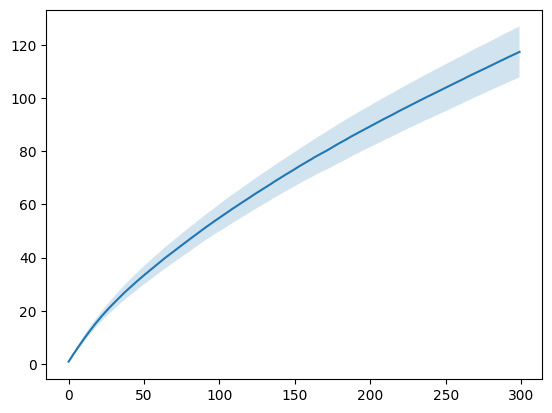

In [60]:
num_cores = 12

res = Parallel(n_jobs=num_cores)(delayed(simulate_quantum)(prot_seq, q, energy_expr, sched, jobid) for jobid in range(720))
tra, H, E, seeds, results = zip(*res)
tra = np.array(tra)
history = np.array(H)
energy = np.array(E)
acp = history.cumsum(axis=1)
plt.plot(acp.mean(axis=0))
plt.fill_between(
    range(acp.shape[1]),
    acp.mean(axis=0) - acp.std(axis=0),
    acp.mean(axis=0) + acp.std(axis=0), alpha=0.2)
plt.show()

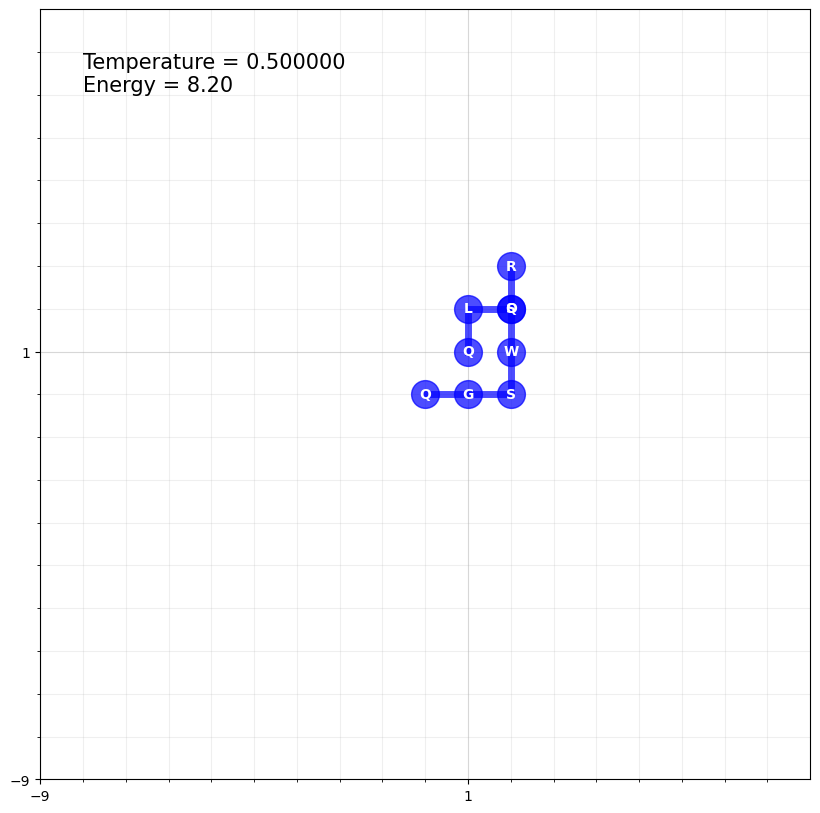

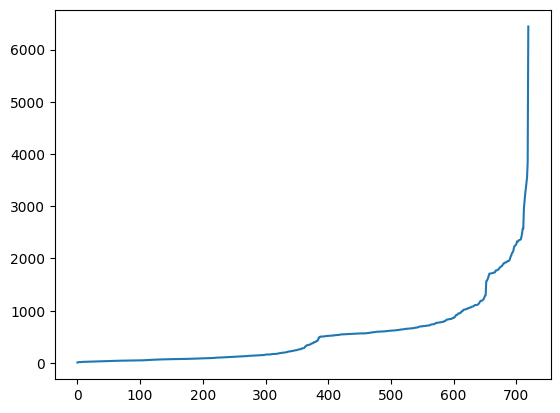

In [61]:
enes = [energy_func(*qs) for qs in results]
best = np.argmin(enes)

make_viz(tra[best], prot_seq, schedule=sched, movie=True, energy_func=energy_func)
all_best = np.array(enes) == min(enes)
(all_best).sum()
plt.plot(np.sort(enes))
plt.show()

In [29]:
rnd_best = np.random.choice(np.argwhere(all_best).reshape((-1,)))
print(rnd_best)
plt.plot(energy[rnd_best])
plt.ylim(min(enes)-5, 200)
plt.show()
show_video()

NameError: name 'all_best' is not defined

In [30]:
def preprocess_expr(H):
    # Helper function to clean resulting expressions
    # some zero coefficients fail to evaluate to 0, rounding is necessary
    # for all qbits, qi**n = qi. bc qi in [0,1]
    H = expand(H).evalf()
    tmp = H
    for a in preorder_traversal(tmp):
        if isinstance(a, Float):
            H = H.subs(a, round(a, 8))
    degr = Poly(H).degree()
    for qi in q:
        for n in reversed(range(2, degr + 1)):
            H = H.subs(qi**n, qi)
    return H
energy_expr = preprocess_expr(energy_expr)
energy_expr

360.0*q0000*q0001*q0002*q0003 + 320.0*q0000*q0001*q0002*q0005 + 320.0*q0000*q0001*q0002*q0007 - 500.0*q0000*q0001*q0002 + 320.0*q0000*q0001*q0003*q0004 + 320.0*q0000*q0001*q0003*q0006 - 500.0*q0000*q0001*q0003 + 320.0*q0000*q0001*q0004*q0005 + 320.0*q0000*q0001*q0004*q0007 - 480.0*q0000*q0001*q0004 + 320.0*q0000*q0001*q0005*q0006 - 480.0*q0000*q0001*q0005 + 320.0*q0000*q0001*q0006*q0007 - 480.0*q0000*q0001*q0006 - 480.0*q0000*q0001*q0007 + 730.0*q0000*q0001 + 320.0*q0000*q0002*q0003*q0005 + 320.0*q0000*q0002*q0003*q0007 - 500.0*q0000*q0002*q0003 + 960.0*q0000*q0002*q0004*q0006 - 480.0*q0000*q0002*q0004 + 320.0*q0000*q0002*q0005*q0007 - 480.0*q0000*q0002*q0005 - 480.0*q0000*q0002*q0006 - 480.0*q0000*q0002*q0007 + 80.0*q0000*q0002*q0010 + 160.0*q0000*q0002*q0011 + 320.0*q0000*q0002*q0012 + 640.0*q0000*q0002*q0013 + 12.76*q0000*q0002*q0024 + 12.04*q0000*q0002*q0026 - 80.0*q0000*q0002 + 320.0*q0000*q0003*q0004*q0005 + 320.0*q0000*q0003*q0004*q0007 - 480.0*q0000*q0003*q0004 + 320.0*q0000*q0